In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [5]:
def costo_MSE(X, y, batch):
    temp = y.size
    errore = np.dot(X, batch.T) - y
    costo = 1/(2*temp) * np.dot(errore.T, errore) #uso questo che ci troviamo con più features
    return costo, errore

def gradient_descent(X, y, batch, alpha, iterazioni):
    costo_array = np.zeros(iterazioni)
    temp = y.size
    for i in range(iterazioni):
        costo, errore = costo_MSE(X, y, batch)
        batch = batch - (alpha * (1/temp) * np.dot(X.T, errore))
        costo_array[i] = costo
    return batch, costo_array

def plotta(iterazioni, costo):
    fig, ax = plt.subplots()
    ax.plot(np.arange(iterazioni), costo, 'r')
    ax.set_xlabel('Iterazioni')
    ax.set_ylabel('Costo')
    ax.set_title('Convergenza di MSE')
    plt.show()    

Valori dei coefficienti iniziali : [0. 0. 0. 0. 0.] ----- Errore costo iniziale di : 0.8333333333333334


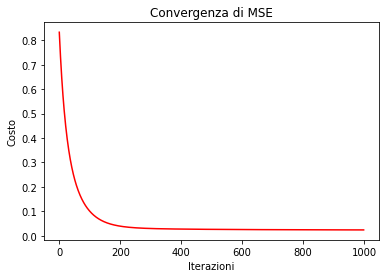

Valori dei coefficienti finali : [ 0.99995683 -0.00157092 -0.05130384  0.32314088  0.44693114] ----- Errore costo finale di : 0.023949904751829235


In [6]:
data = load_iris()

Features = pd.DataFrame(data.data, columns=data.feature_names)
Target = pd.DataFrame(data.target, columns=['Target'])
df = Features.join(Target)
X = df.drop('Target', axis=1)
y = df.Target

# normalizzo
X = (X - X.mean()) / X.std()
# aggiungo colonna per permettere al gradient descent di lavorare con più features
X = np.c_[np.ones(X.shape[0]), X] 
#metto valori di learning_rate e iterazioni, questo sono le più performanti
learning_rate = 0.01 #alpha=learning_rate
iterazioni = 1000
#inizializzo coefficienti a zero
coeff = np.zeros(X.shape[1])
costo_zero, _ = costo_MSE(X, y, coeff)

print('Valori dei coefficienti iniziali : {0} ----- Errore costo iniziale di : {1}'.format(coeff, costo_zero))

# Run Gradient Descent
coeff, costo = gradient_descent(X, y, coeff, learning_rate, iterazioni)

# Display cost chart
plotta(iterazioni, costo)

costo_finale, _ = costo_MSE(X, y, coeff)

print('Valori dei coefficienti finali : {0} ----- Errore costo finale di : {1}'.format(coeff, costo_finale))

#Non plotto la linear regression poichè lavoro con 4 features e 3 target -> non riesco a presentare il grafico con queste dimensioni
#Però c'è la convergenza di MSE e questo è sensato
#Inoltre si trovano dei coefficienti per la funzione della linear regression e questo significa che l'algoritmo trova una solouzione